In [267]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [268]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Prepare training dataset

In [269]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [270]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [271]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [272]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [273]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [274]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [275]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [276]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [277]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [278]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [279]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:12,  9.32it/s]                         


Epoch 1 of 100
Generator loss: 1.22525191, Discriminator loss: 0.95136029


118it [00:12,  9.34it/s]                         


Epoch 2 of 100
Generator loss: 1.54603994, Discriminator loss: 1.14482045


118it [00:12,  9.36it/s]                         


Epoch 3 of 100
Generator loss: 1.84469056, Discriminator loss: 1.23214960


118it [00:12,  9.41it/s]                         


Epoch 4 of 100
Generator loss: 1.34032881, Discriminator loss: 1.14555764


118it [00:12,  9.39it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


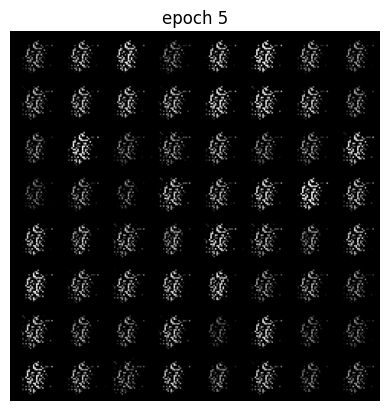

Epoch 5 of 100
Generator loss: 2.12129474, Discriminator loss: 1.25244462


118it [00:12,  9.39it/s]                         


Epoch 6 of 100
Generator loss: 2.76774669, Discriminator loss: 1.33418405


118it [00:12,  9.41it/s]                         


Epoch 7 of 100
Generator loss: 2.15189648, Discriminator loss: 1.12949073


118it [00:12,  9.40it/s]                         


Epoch 8 of 100
Generator loss: 0.82034856, Discriminator loss: 1.18924046


118it [00:12,  9.52it/s]                         


Epoch 9 of 100
Generator loss: 1.50953734, Discriminator loss: 1.16357410


118it [00:12,  9.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


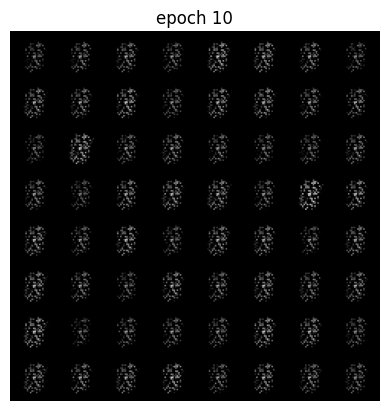

Epoch 10 of 100
Generator loss: 1.25134134, Discriminator loss: 1.27450597


118it [00:12,  9.51it/s]                         


Epoch 11 of 100
Generator loss: 1.06929898, Discriminator loss: 1.37493193


118it [00:12,  9.50it/s]                         


Epoch 12 of 100
Generator loss: 0.91788876, Discriminator loss: 1.09714794


118it [00:12,  9.51it/s]                         


Epoch 13 of 100
Generator loss: 0.93406957, Discriminator loss: 1.45625961


118it [00:12,  9.51it/s]                         


Epoch 14 of 100
Generator loss: 1.10943651, Discriminator loss: 1.10372853


118it [00:12,  9.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


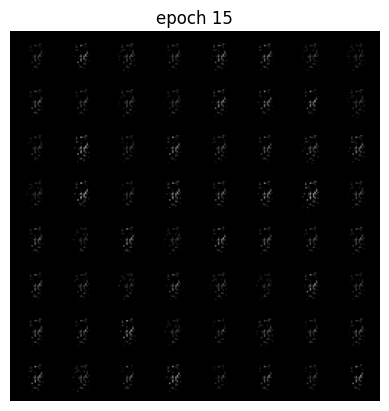

Epoch 15 of 100
Generator loss: 1.02783430, Discriminator loss: 1.07074106


118it [00:12,  9.42it/s]                         


Epoch 16 of 100
Generator loss: 2.14018798, Discriminator loss: 0.77855337


118it [00:12,  9.50it/s]                         


Epoch 17 of 100
Generator loss: 2.02200890, Discriminator loss: 0.67752039


118it [00:12,  9.54it/s]                         


Epoch 18 of 100
Generator loss: 3.10563111, Discriminator loss: 0.56569093


118it [00:12,  9.50it/s]                         


Epoch 19 of 100
Generator loss: 2.00703788, Discriminator loss: 0.85432982


118it [00:12,  9.45it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


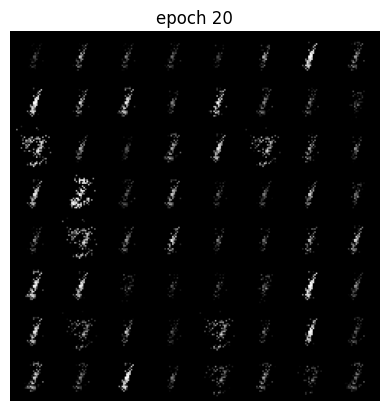

Epoch 20 of 100
Generator loss: 2.25887179, Discriminator loss: 0.75164074


118it [00:12,  9.53it/s]                         


Epoch 21 of 100
Generator loss: 2.00043225, Discriminator loss: 0.75329918


118it [00:12,  9.52it/s]                         


Epoch 22 of 100
Generator loss: 2.35603952, Discriminator loss: 0.68692058


118it [00:12,  9.52it/s]                         


Epoch 23 of 100
Generator loss: 2.34804273, Discriminator loss: 0.62482601


118it [00:12,  9.53it/s]                         


Epoch 24 of 100
Generator loss: 2.18445849, Discriminator loss: 0.80961907


118it [00:12,  9.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


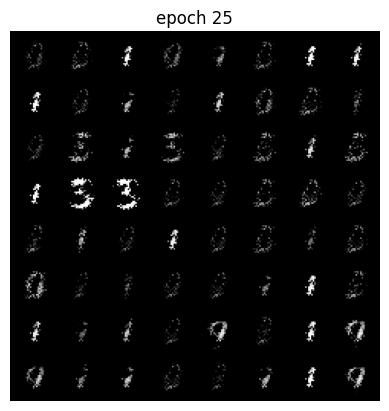

Epoch 25 of 100
Generator loss: 1.83570206, Discriminator loss: 0.89006120


118it [00:12,  9.52it/s]                         


Epoch 26 of 100
Generator loss: 1.91608477, Discriminator loss: 0.72542965


118it [00:12,  9.52it/s]                         


Epoch 27 of 100
Generator loss: 2.13888001, Discriminator loss: 0.73108250


118it [00:12,  9.40it/s]                         


Epoch 28 of 100
Generator loss: 2.38214612, Discriminator loss: 0.64151084


118it [00:12,  9.15it/s]                         


Epoch 29 of 100
Generator loss: 1.96437025, Discriminator loss: 0.71276051


118it [00:14,  8.36it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


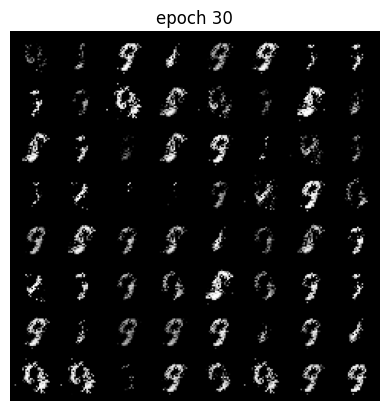

Epoch 30 of 100
Generator loss: 2.12816834, Discriminator loss: 0.74303925


118it [00:15,  7.51it/s]                         


Epoch 31 of 100
Generator loss: 2.00731087, Discriminator loss: 0.79788458


118it [00:14,  8.39it/s]                         


Epoch 32 of 100
Generator loss: 2.08689570, Discriminator loss: 0.71045601


118it [00:13,  8.73it/s]                         


Epoch 33 of 100
Generator loss: 1.97156358, Discriminator loss: 0.72212398


118it [00:12,  9.13it/s]                         


Epoch 34 of 100
Generator loss: 2.28845477, Discriminator loss: 0.61297381


118it [00:12,  9.25it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


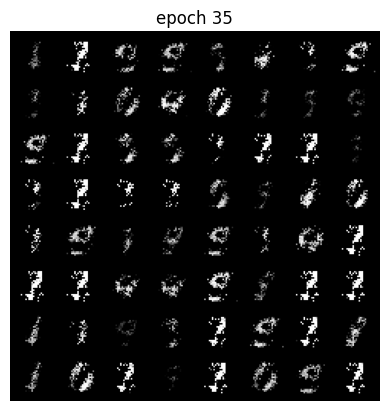

Epoch 35 of 100
Generator loss: 2.11516237, Discriminator loss: 0.77719784


118it [00:12,  9.49it/s]                         


Epoch 36 of 100
Generator loss: 2.14350104, Discriminator loss: 0.66716218


118it [00:12,  9.52it/s]                         


Epoch 37 of 100
Generator loss: 2.76541185, Discriminator loss: 0.68487018


118it [00:12,  9.50it/s]                         


Epoch 38 of 100
Generator loss: 2.29683614, Discriminator loss: 0.69859785


118it [00:12,  9.52it/s]                         


Epoch 39 of 100
Generator loss: 2.34771514, Discriminator loss: 0.72732466


118it [00:12,  9.36it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


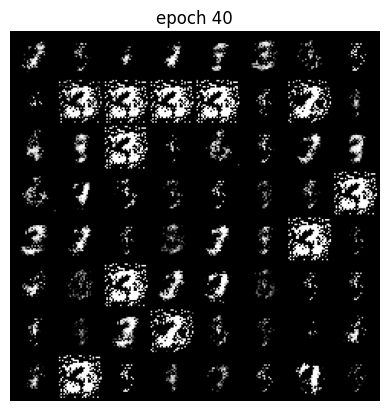

Epoch 40 of 100
Generator loss: 2.80744863, Discriminator loss: 0.60871953


118it [00:12,  9.51it/s]                         


Epoch 41 of 100
Generator loss: 2.71933579, Discriminator loss: 0.60028809


118it [00:12,  9.53it/s]                         


Epoch 42 of 100
Generator loss: 3.03766632, Discriminator loss: 0.62291116


118it [00:12,  9.52it/s]                         


Epoch 43 of 100
Generator loss: 2.40891981, Discriminator loss: 0.65196967


118it [00:12,  9.34it/s]                         


Epoch 44 of 100
Generator loss: 2.36899018, Discriminator loss: 0.63322020


118it [00:12,  9.44it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


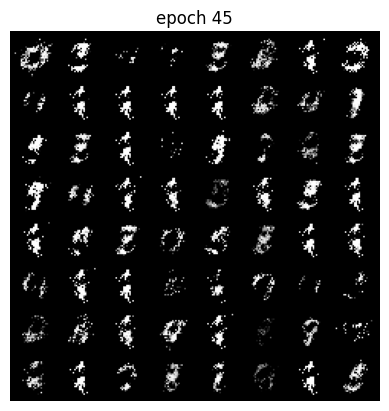

Epoch 45 of 100
Generator loss: 2.60707688, Discriminator loss: 0.60170650


118it [00:12,  9.21it/s]                         


Epoch 46 of 100
Generator loss: 2.85133004, Discriminator loss: 0.57762486


118it [00:12,  9.51it/s]                         


Epoch 47 of 100
Generator loss: 2.54566908, Discriminator loss: 0.62536085


118it [00:12,  9.51it/s]                         


Epoch 48 of 100
Generator loss: 2.59011102, Discriminator loss: 0.62739968


118it [00:12,  9.50it/s]                         


Epoch 49 of 100
Generator loss: 2.48416853, Discriminator loss: 0.68771899


118it [00:12,  9.43it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


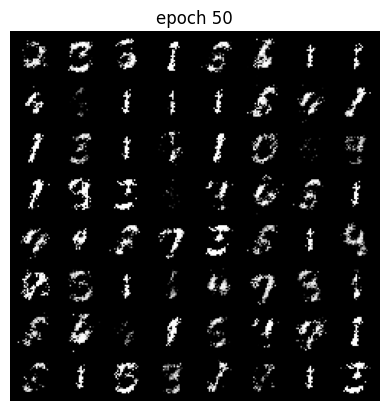

Epoch 50 of 100
Generator loss: 2.64049840, Discriminator loss: 0.61866212


118it [00:12,  9.53it/s]                         


Epoch 51 of 100
Generator loss: 2.56906700, Discriminator loss: 0.65331221


118it [00:12,  9.35it/s]                         


Epoch 52 of 100
Generator loss: 2.66694021, Discriminator loss: 0.61698252


118it [00:12,  9.53it/s]                         


Epoch 53 of 100
Generator loss: 2.57486868, Discriminator loss: 0.66388619


118it [00:12,  9.54it/s]                         


Epoch 54 of 100
Generator loss: 2.54478955, Discriminator loss: 0.70168573


118it [00:12,  9.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


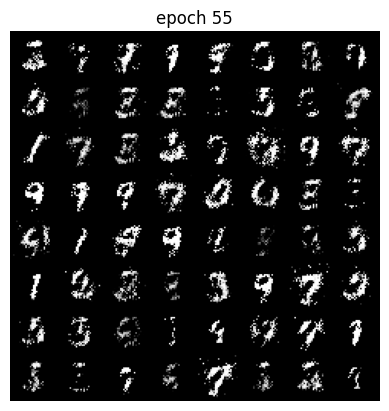

Epoch 55 of 100
Generator loss: 2.56117320, Discriminator loss: 0.66273624


118it [00:12,  9.51it/s]                         


Epoch 56 of 100
Generator loss: 2.35019636, Discriminator loss: 0.72464061


118it [00:12,  9.51it/s]                         


Epoch 57 of 100
Generator loss: 1.98235977, Discriminator loss: 0.80035621


118it [00:12,  9.55it/s]                         


Epoch 58 of 100
Generator loss: 2.05215859, Discriminator loss: 0.71876585


118it [00:12,  9.51it/s]                         


Epoch 59 of 100
Generator loss: 2.28666353, Discriminator loss: 0.70570523


118it [00:12,  9.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


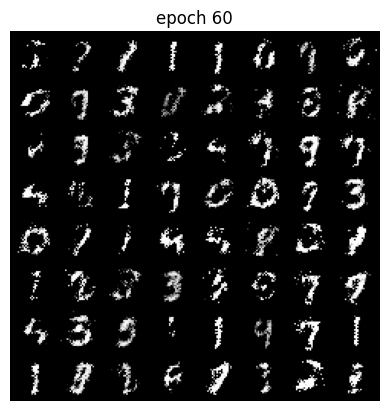

Epoch 60 of 100
Generator loss: 2.18479538, Discriminator loss: 0.74110645


118it [00:12,  9.51it/s]                         


Epoch 61 of 100
Generator loss: 2.08599925, Discriminator loss: 0.72586000


118it [00:12,  9.54it/s]                         


Epoch 62 of 100
Generator loss: 2.04234695, Discriminator loss: 0.76106024


118it [00:12,  9.54it/s]                         


Epoch 63 of 100
Generator loss: 2.12430596, Discriminator loss: 0.74267685


118it [00:12,  9.42it/s]                         


Epoch 64 of 100
Generator loss: 2.03664637, Discriminator loss: 0.76860690


118it [00:12,  9.55it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


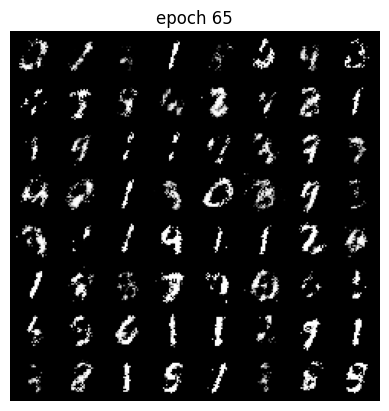

Epoch 65 of 100
Generator loss: 2.09834194, Discriminator loss: 0.76128882


118it [00:12,  9.52it/s]                         


Epoch 66 of 100
Generator loss: 2.09585214, Discriminator loss: 0.75904745


118it [00:12,  9.53it/s]                         


Epoch 67 of 100
Generator loss: 2.03455734, Discriminator loss: 0.75368738


118it [00:12,  9.54it/s]                         


Epoch 68 of 100
Generator loss: 2.11378455, Discriminator loss: 0.75460678


118it [00:12,  9.42it/s]                         


Epoch 69 of 100
Generator loss: 1.92108071, Discriminator loss: 0.77827770


118it [00:12,  9.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


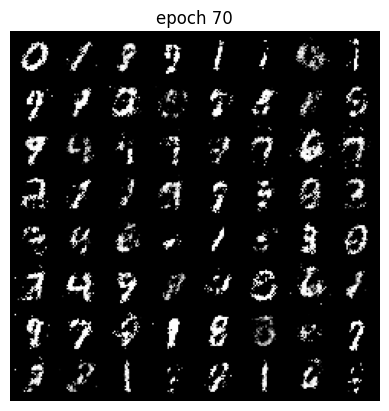

Epoch 70 of 100
Generator loss: 2.00625944, Discriminator loss: 0.80265075


118it [00:12,  9.48it/s]                         


Epoch 71 of 100
Generator loss: 1.79542542, Discriminator loss: 0.83242548


118it [00:12,  9.49it/s]                         


Epoch 72 of 100
Generator loss: 1.85345554, Discriminator loss: 0.81398427


118it [00:12,  9.45it/s]                         


Epoch 73 of 100
Generator loss: 1.87130892, Discriminator loss: 0.83146781


118it [00:12,  9.49it/s]                         


Epoch 74 of 100
Generator loss: 1.89288652, Discriminator loss: 0.79097897


118it [00:12,  9.41it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


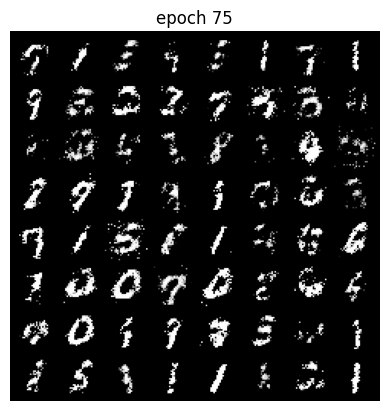

Epoch 75 of 100
Generator loss: 2.00542498, Discriminator loss: 0.78734481


118it [00:12,  9.23it/s]                         


Epoch 76 of 100
Generator loss: 1.95663607, Discriminator loss: 0.80929941


118it [00:12,  9.35it/s]                         


Epoch 77 of 100
Generator loss: 1.79125035, Discriminator loss: 0.85458213


118it [00:12,  9.39it/s]                         


Epoch 78 of 100
Generator loss: 1.84297943, Discriminator loss: 0.81714374


118it [00:12,  9.44it/s]                         


Epoch 79 of 100
Generator loss: 1.98615146, Discriminator loss: 0.79273349


118it [00:12,  9.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


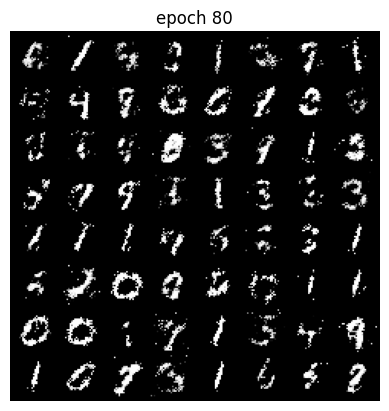

Epoch 80 of 100
Generator loss: 1.85325277, Discriminator loss: 0.83515513


118it [00:12,  9.42it/s]                         


Epoch 81 of 100
Generator loss: 1.95324147, Discriminator loss: 0.80878431


118it [00:12,  9.33it/s]                         


Epoch 82 of 100
Generator loss: 1.96852386, Discriminator loss: 0.80823010


118it [00:12,  9.47it/s]                         


Epoch 83 of 100
Generator loss: 1.83001840, Discriminator loss: 0.83094507


118it [00:12,  9.29it/s]                         


Epoch 84 of 100
Generator loss: 1.85383403, Discriminator loss: 0.85147822


118it [00:12,  9.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


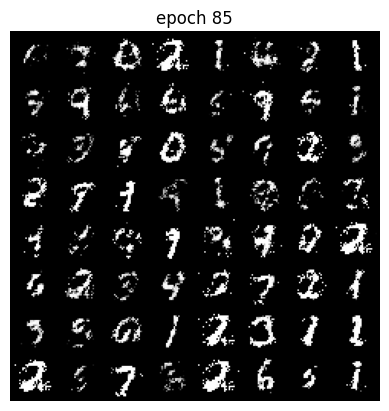

Epoch 85 of 100
Generator loss: 1.99178648, Discriminator loss: 0.78905761


118it [00:12,  9.33it/s]                         


Epoch 86 of 100
Generator loss: 1.97497296, Discriminator loss: 0.78523672


118it [00:12,  9.45it/s]                         


Epoch 87 of 100
Generator loss: 1.90349376, Discriminator loss: 0.82852006


118it [00:12,  9.31it/s]                         


Epoch 88 of 100
Generator loss: 1.87476575, Discriminator loss: 0.82815039


118it [00:12,  9.52it/s]                         


Epoch 89 of 100
Generator loss: 1.85887146, Discriminator loss: 0.83476210


118it [00:12,  9.54it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


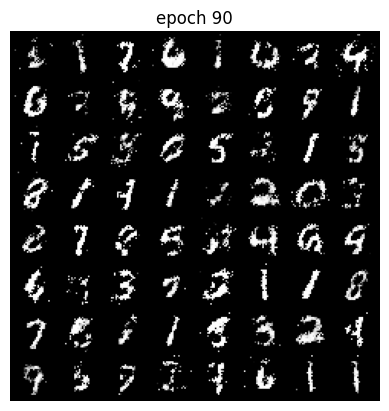

Epoch 90 of 100
Generator loss: 1.76586437, Discriminator loss: 0.86015630


118it [00:12,  9.29it/s]                         


Epoch 91 of 100
Generator loss: 1.74696314, Discriminator loss: 0.85628587


118it [00:12,  9.43it/s]                         


Epoch 92 of 100
Generator loss: 1.77280867, Discriminator loss: 0.82335973


118it [00:12,  9.40it/s]                         


Epoch 93 of 100
Generator loss: 1.73575652, Discriminator loss: 0.88454741


118it [00:12,  9.51it/s]                         


Epoch 94 of 100
Generator loss: 1.79320347, Discriminator loss: 0.85634339


118it [00:12,  9.49it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


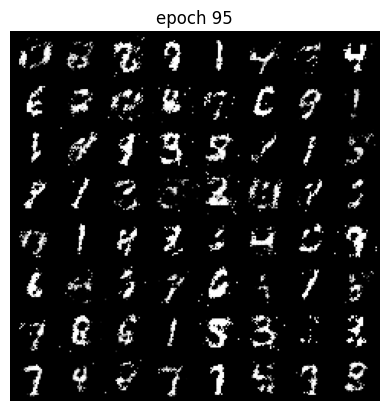

Epoch 95 of 100
Generator loss: 1.83652318, Discriminator loss: 0.84022814


118it [00:12,  9.50it/s]                         


Epoch 96 of 100
Generator loss: 1.85641241, Discriminator loss: 0.83905685


118it [00:12,  9.52it/s]                         


Epoch 97 of 100
Generator loss: 1.71254265, Discriminator loss: 0.87345934


118it [00:12,  9.54it/s]                         


Epoch 98 of 100
Generator loss: 1.78460133, Discriminator loss: 0.84673303


118it [00:12,  9.50it/s]                         


Epoch 99 of 100
Generator loss: 1.76766419, Discriminator loss: 0.85848981


118it [00:12,  9.45it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


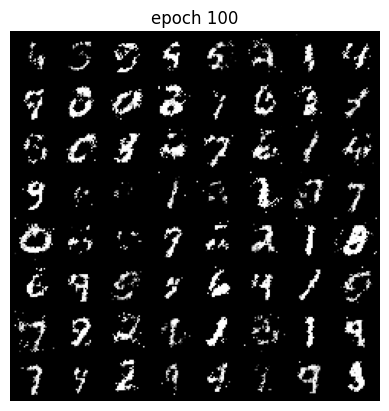

Epoch 100 of 100
Generator loss: 1.79438770, Discriminator loss: 0.84868520


In [280]:
torch.manual_seed(7777)

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, (data, target) in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        ## Discriminator stuff
        optim_d.zero_grad()

        # Real data       
        discriminator_real_predict = discriminator.forward(data.to(device))
        true_label = torch.ones_like(discriminator_real_predict, device=device)
        true_loss = criterion(discriminator_real_predict, true_label)

        # Fake data
        noise_samples = [create_noise(sample_size, nz).to(device) for _ in range(batch_size)]
        noise_samples = torch.stack(noise_samples, dim=0)
        fake_data = generator.forward(noise)
        discriminator_fake_predict = discriminator.forward(fake_data.detach())
        fake_label = torch.zeros_like(discriminator_fake_predict, device=device)
        loss_fake = criterion(discriminator_fake_predict, fake_label)

        discriminator_loss = true_loss + loss_fake
        loss_d += discriminator_loss

        discriminator_loss.backward()
        optim_d.step()

        ## Generator stuff

        optim_g.zero_grad()

        discriminator_fake_predict_2 = discriminator.forward(fake_data)
        true_label_2 = torch.ones_like(discriminator_fake_predict_2)

        generator_loss = criterion(discriminator_fake_predict_2, true_label_2)
        loss_g += generator_loss

        generator_loss.backward()
        optim_g.step()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g.cpu().detach())
    losses_d.append(epoch_loss_d.cpu().detach())
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [281]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [282]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

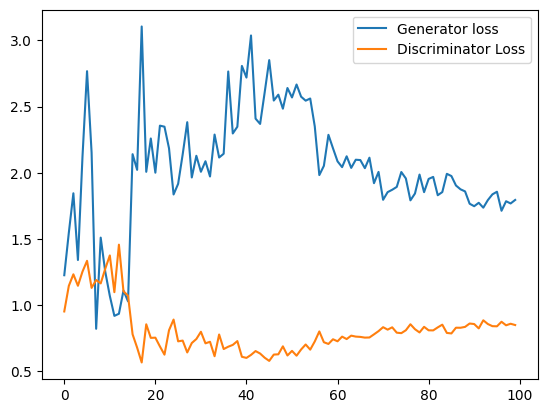

In [283]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')